### ML vocabulary and notation

#### Marketing campaign dataset

In [1]:
import pandas as pd

data_df = pd.read_csv("c3_marketing-campaign.csv")
data_df.head()

,tv,web,radio,sales
0,0.916,1.689,0.208,1.204
1,9.359,1.706,1.071,4.800
2,5.261,2.538,2.438,3.970
3,8.682,2.092,1.283,5.212
4,11.736,1.660,1.800,5.993


Each row is a previous marketing campaign and has four values. The first three are the corresponding budgets for each media in thousands of dollars, and the last one is the sales in thousands of units.

Let’s plot the data using a scatter plot for each marketing budget.

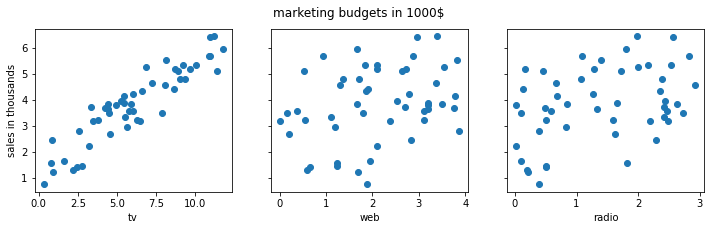

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), sharey=True)
fig.suptitle("marketing budgets in 1000$")
ax1.scatter(data_df.tv, data_df.sales)
ax1.set_xlabel("tv")
ax1.set_ylabel("sales in thousands")
ax2.scatter(data_df.web, data_df.sales)
ax2.set_xlabel("web")
ax3.scatter(data_df.radio, data_df.sales)
ax3.set_xlabel("radio")
plt.show()

As we can see, there is a clear correlation between the television budget and the sales. However, before fitting models to this data, let’s learn about the basic jargon and notation to describe datasets.

#### Machine learning jargon

The data_df DataFrame has four columns and 50 rows.

In [3]:
print("Shape of data_df:", data_df.shape)

Shape of data_df: (50, 4)


For instance, in our example, we want to predict the sales given the different budgets. Hence, the sales variable is called the target or output variable. On the other hand, we compute predictions based on the budget variables. Hence, the tv, web and radio budgets are the features or input variables in our problem.

Hopefully, we measured relevant features that explain well the target variable. For this reason, features are sometimes called the explanatory variables. On the other hand, we could say that the target variable depends on the set of input variables that we measured, so we sometimes call it the dependent variable.

#### Feature matrix and target vector
In this course, we will always start by loading the features into a feature matrix X and the target values into an output vector y. We will need these two variables when applying machine learning algorithms.

In [4]:
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

In [5]:
print("Shape of X: {} dtype: {}".format(X.shape, X.dtype))

Shape of X: (50, 3) dtype: float64


In [6]:
print("Shape of y: {} dtype: {}".format(y.shape, y.dtype))

Shape of y: (50,) dtype: float64


As you can see, we extract the three features into a variable X by dropping the sales column, and we create a target vector y from it. We then convert them into Numpy arrays using the .values attribute.

Note that we cannot use the loc() and iloc() functions since X/y are not Pandas objects anymore. However, we can use the standard slicing notation from Numpy to get the data points



In [7]:
X[:5, :]

array([[ 0.916,  1.689,  0.208],
       [ 9.359,  1.706,  1.071],
       [ 5.261,  2.538,  2.438],
       [ 8.682,  2.092,  1.283],
       [11.736,  1.66 ,  1.8  ]])

In [8]:
y[:5]

array([1.204, 4.8  , 3.97 , 5.212, 5.993])

Let’s now learn about the basic mathematical notation that we will find in most machine learning resources to denote the input/output data.

#### Mathematical notation
The mathematical notation is an essential part of the machine learning vocabulary. It allows expressing ideas in a very concise way. In this section, we will go through the important symbols to describe datasets.

* First, the X variable refers to the input or feature matrix. 
* Each row in this matrix is a data point. We denote the i-th data point with the vector xi
* Each element of this vector is the value of a feature. We use the xij notation to refer to the value of the j-th feature of the i-th data point. 

We usually refer to the cardinality of the dataset with the letter n and to the dimensionality with 
p. In our example, there are n=50 data points, and p=3 parameters (or features). Hence, x(n,p) refers to the last feature of the last data point. Note that some sources also use a capital N to denote the number of data points, and the letters M, P or D 
for the dimensionality.

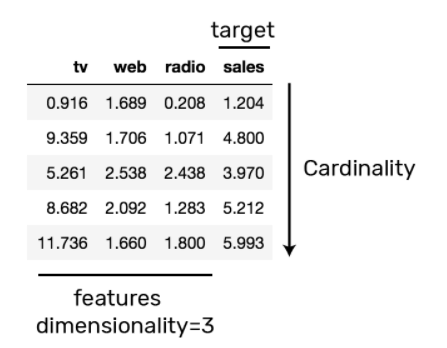

In [17]:
from IPython.display import Image
Image(filename="notation.png")

In the next exercise, you will create a model to predict the daily number of users of a bike sharing service based on temperature values. In that case, the temperature variable is the only feature, and it doesn’t make sense to write each data point as a vector with a single value. Hence, we will omit the arrow, and denote the i-th data point with xi. (for instance xn corresponds to the last value). We use a similar notation for target values. We group them in an output vector y in which each element y(i) refers to the target value of the i-th data point. 

In machine learning the input X is known as the feature matrix. Its columns may be referred to as
- input variables,
- features,
- explanatory variables, or
- independent variables.

The column vector of y is known as the
- output,
- target, or
- dependent variable

The shape of X is given by the cardinality (number of rows) and the dimensionality (number of columns).

**The dimensionality should not be greater than the cardinality**

#### Simple linear regressions

In a previous unit, we fitted several polynomials of different degrees to a set of x and y data points using the Numpy polyfit(x, y, deg) function. We saw that it fits a line when we set the degree to one and returns the optimal a and b coefficients. In fact, this corresponds to a simple linear regression model. In this unit, we will learn more about it and see what it means for the a and b parameters to be optimal.

First, let’s start by loading the marketing-campaign.csv dataset. The simple linear regression model works with a single feature. However, the dataset has three input variables, one for each media budget

- Television
- Web
- Radio
Hence, we need to choose which one to use with this model to predict the sales target variable.

In a previous unit, we plotted each advertising budget and saw that there is a clear correlation between the television budget and sales. Hence, it’s a good idea to start with this feature. In this code, we load the dataset into a DataFrame and create the x and y Numpy arrays.

In [10]:
import pandas as pd

# Load the dataset
data_df = pd.read_csv("c3_marketing-campaign.csv")

# Extract x/y values
x = data_df.tv.values
y = data_df.sales.values

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (50,)
y shape: (50,)


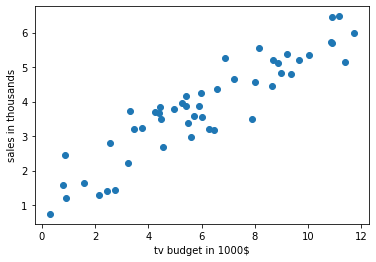

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data
plt.scatter(x, y)
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.show()

It seems that an increase in the television budget creates a proportional increase in sales which is precisely what a line expresses geometrically. The idea of simple linear regressions is to quantify this linear relationship by fitting the equation of a line to the data points

#### Polyfit function
Let’s see again how to fit this simple linear regression model with the polyfit() function

In [13]:
import numpy as np

# Fit a linear regression
coefs = np.polyfit(x, y, deg=1)
print("Coefficients:", coefs)

Coefficients: [0.42063597 1.27867727]


In [14]:
# Generate a hundred data points
x_values = np.linspace(x.min(), x.max(), num=100)

# Compute predictions
y_values = np.polyval(coefs, x_values)

In this code, we pass the (xi,yi) data points to the polyfit() function and set the degree to one to fit the equation of a line. The function computes these optimal a, b parameters and we store them in a coefs variable. We can then use these values to compute predictions y for a hundred different television budgets x between x.min() and x.max() using the polyval() function, which evaluates the equation from above.

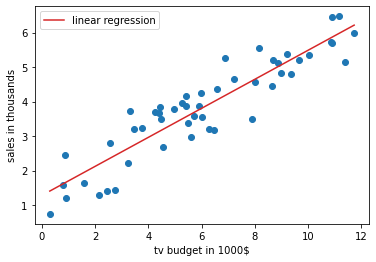

In [15]:
# Plot predictions
plt.scatter(x, y)
plt.plot(x_values, y_values, c="C3", label="linear regression")
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

To summarize, simple linear regressions model the relationship between a single feature and the target variable using the equation of a line which depends on two parameters: a and b. Later in this course, we will see how we can generalize simple linear regressions to multiple input features. We will then call the model multiple linear regressions or just linear regressions since having multiple features is the standard scenario in ML.

#### Optimal parameters
Let’s now see what the polyfit() function optimizes when it fits this equation of a line. The Numpy documentation page of the polyfit() function states that it optimizes the squared error. By fitting a line, we approximate the data points. The error term in this sentence refers to the difference between our approximation (y hat) and the observed value.This quantity is known as the Residual Sum of Squares (RSS) and is a standard way to measure how much error a machine learning model makes.

RSS=∑=1(yi-yi(hat))^2


Measuring the amount of error that our models do is really at the hearth of machine learning approaches. In this course, we will see different metrics. But the RSS is one of the most used one when evaluating regression models.

You can take a look at this interactive visualization by Evan Sadler to see how the optimal line changes to minimize these squared residuals when adding new data points.

#### Compute the RSS score
Let’s now see how to compute this RSS measure for the model and data from above using Python. 

#### Visualizing the RSS metric
A nice way to visualize these squared residuals is to draw squares between the observed data points and the predicted values on the line - here is an interactive visualization by Victor Powell and Lewis Lehe which does that.

Try to adjust the dials for the slope and intercept a,b parameters and see how they affect the RSS score!
* https://setosa.io/ev/ordinary-least-squares-regression/

In [16]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

modified_coefs = [0.4, 1.3]
y_pred = np.polyval(modified_coefs, x)
print('RSS value:', RSS(y, y_pred)) # 16.48706488 which is larger

RSS value: 16.48706488
